# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [31]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")
transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [33]:
# TODO: view the shape of your data
transactions.shape

(1000000, 10)

In [34]:
# TODO: Begin your EDA
transactions.describe()
transactions.groupby('isFraud')['amount'].count() 

#Making digestible: Spiltting up fraud(1) vs non fraud(0) counts to observe the counts of fraud vs non-fraud transactions
fraud_counts = transactions[transactions['isFraud'] == 1].count()['isFraud']
non_fraud_counts = transactions[transactions['isFraud'] == 0].count()['isFraud']
print(f"Fraudulent transactions: {fraud_counts}")
print(f"Non-fraudulent transactions: {non_fraud_counts}")

Fraudulent transactions: 1297
Non-fraudulent transactions: 998703


*Noticable imbalance suggested in mean, comfirmed in count.* 

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

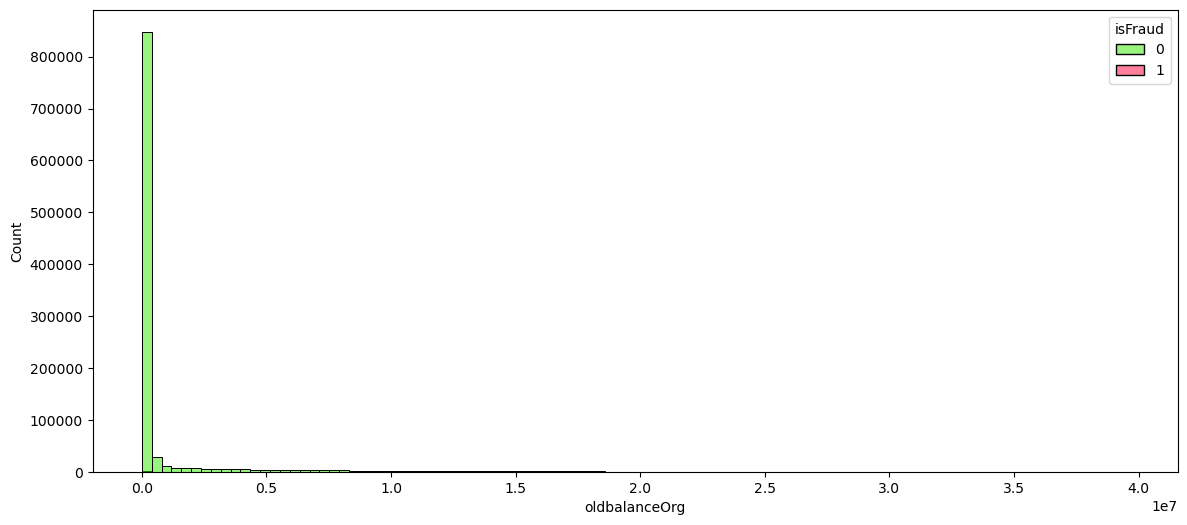

In [35]:
#Q1: Comparing numeric feartures 'oldbalanceOrg'amounts using hisotogram to observe transaction behaviors 
plt.figure(figsize=(14, 6))
sns.histplot(data = transactions, x= 'oldbalanceOrg', bins=100, hue='isFraud', palette='prism')

<Axes: xlabel='newbalanceOrig', ylabel='Count'>

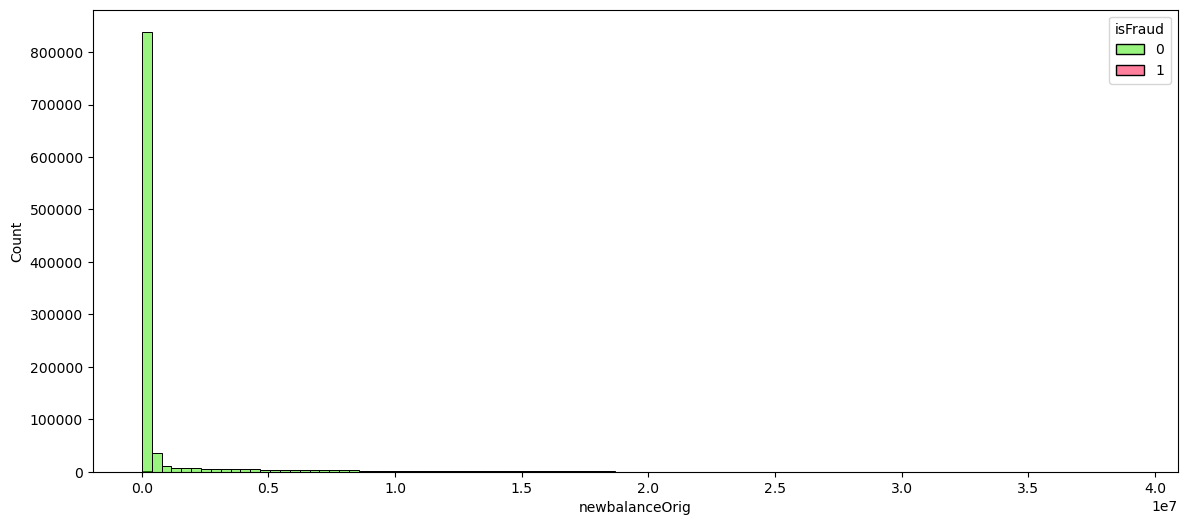

In [36]:
#Q1: Comparing numeric feartures 'newbalanceOrig' amounts using hisotogram to observe transaction behaviors 
plt.figure(figsize=(14, 6))
sns.histplot(data = transactions, x= 'newbalanceOrig', bins=100, hue='isFraud', palette='prism')

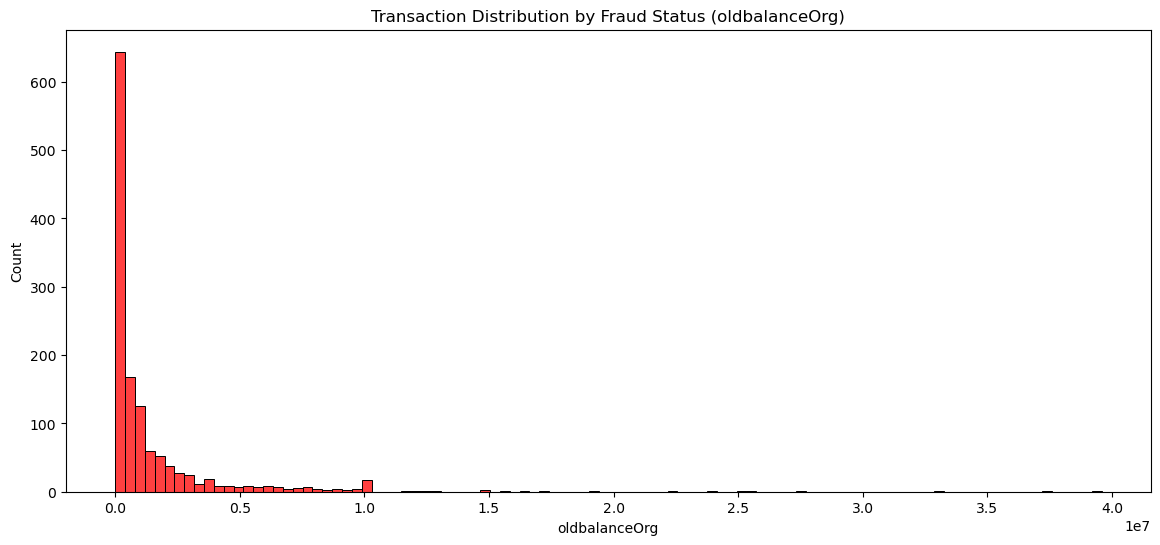

In [57]:
# Separate datasets to observe fraudulent acts
fraud = transactions[transactions['isFraud'] == 1]
non_fraud = transactions[transactions['isFraud'] == 0]

# Plot both histogram
plt.figure(figsize=(14, 6))
sns.histplot(data =fraud, x= 'oldbalanceOrg', bins=100, color='red', label='Fraud')

plt.title('Transaction Distribution by Fraud Status (oldbalanceOrg)')
plt.xlabel('oldbalanceOrg')
plt.ylabel('Count')
plt.show()


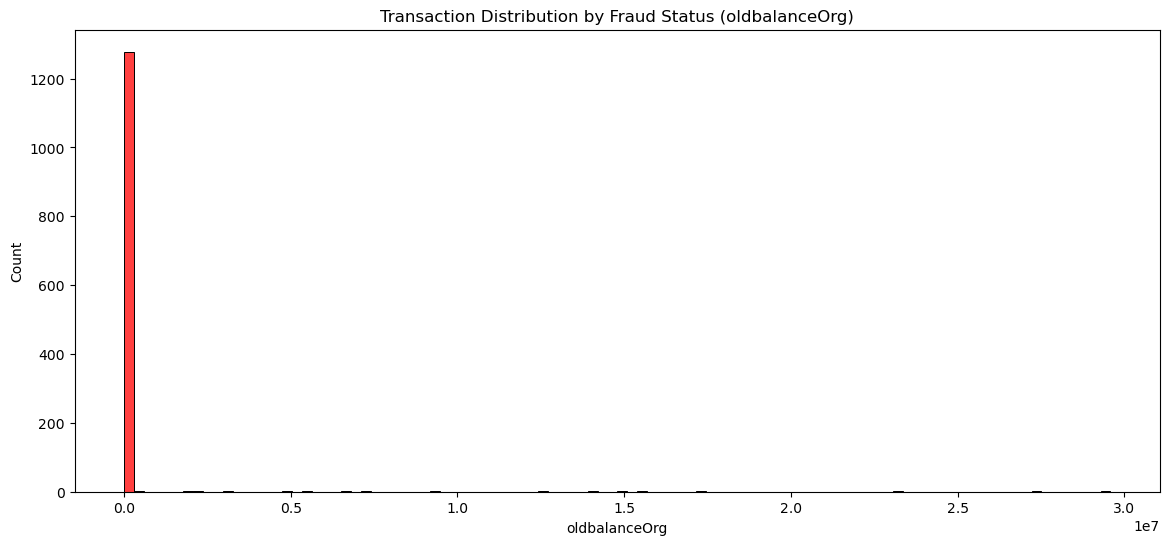

In [58]:
# Plot both histogram
plt.figure(figsize=(14, 6))
sns.histplot(data =fraud, x= 'newbalanceOrig', bins=100, color='red', label='Fraud')

plt.title('Transaction Distribution by Fraud Status (oldbalanceOrg)')
plt.xlabel('oldbalanceOrg')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='oldbalanceOrg', ylabel='newbalanceOrig'>

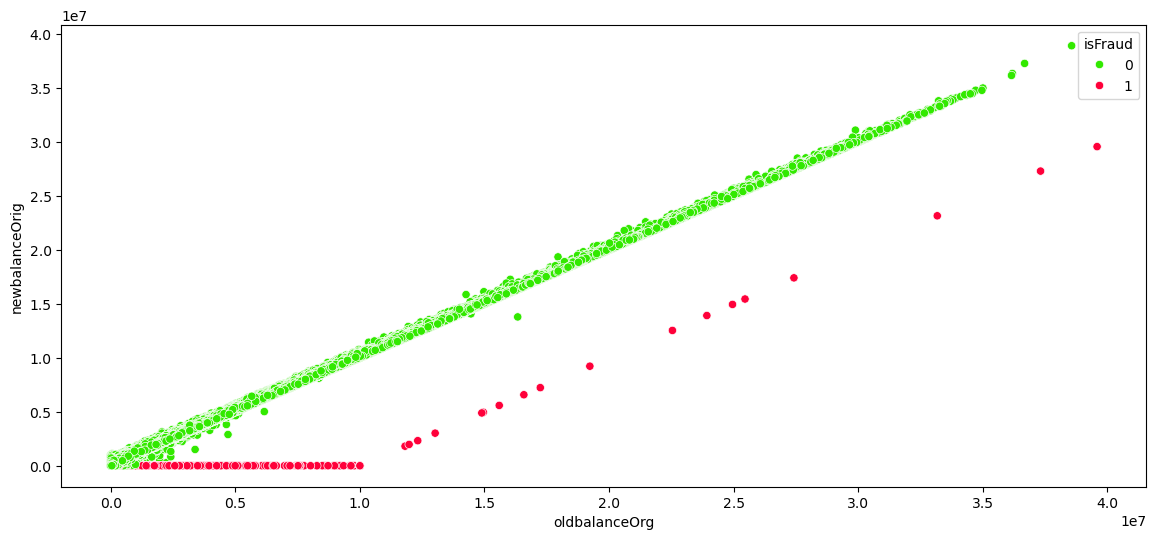

In [37]:
#Q2: Comparing transactions 'oldbalanceOrg' and 'newbalanceOrig' to observe fradulent behaviors using scatter plot
plt.figure(figsize=(14, 6))
sns.scatterplot(data = transactions, x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', palette='prism')    

Text(0.5, 1.0, 'Old Balance vs New Balance (Destination Account) by Fraud Status')

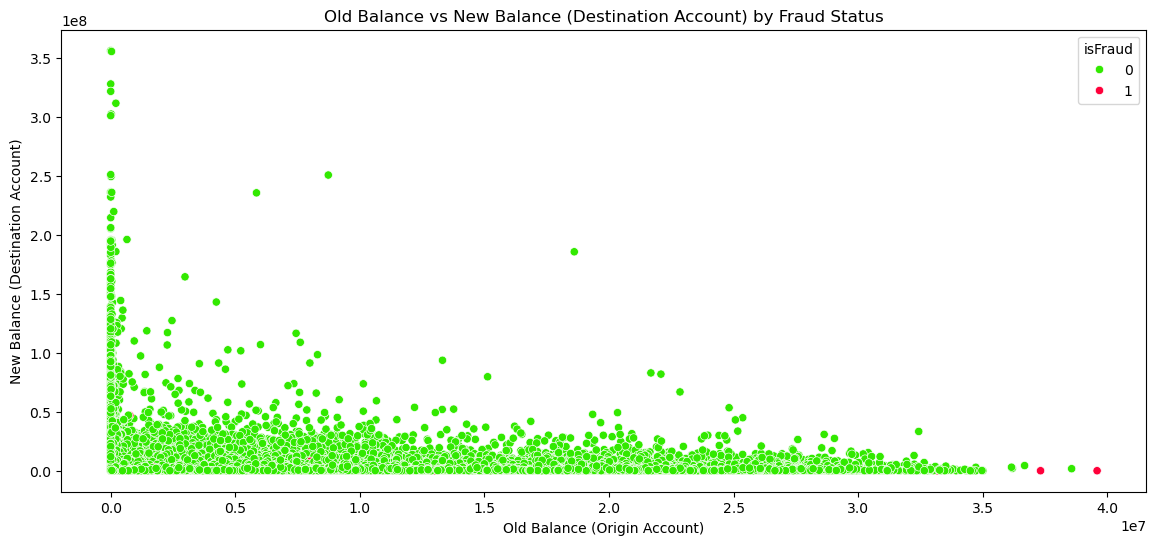

In [38]:
#Q2:scattrer plot of 'oldbalanceorg' and 'newbalanceDest'
plt.figure(figsize=(14,6))
sns.scatterplot(data =transactions, x='oldbalanceOrg', y='newbalanceDest', hue='isFraud', palette= 'prism')
plt.xlabel("Old Balance (Origin Account)")
plt.ylabel("New Balance (Destination Account)") 
plt.title("Old Balance vs New Balance (Destination Account) by Fraud Status")

Text(0.5, 1.0, 'Transaction Amount vs New Balance (Origin Account) by Fraud Status')

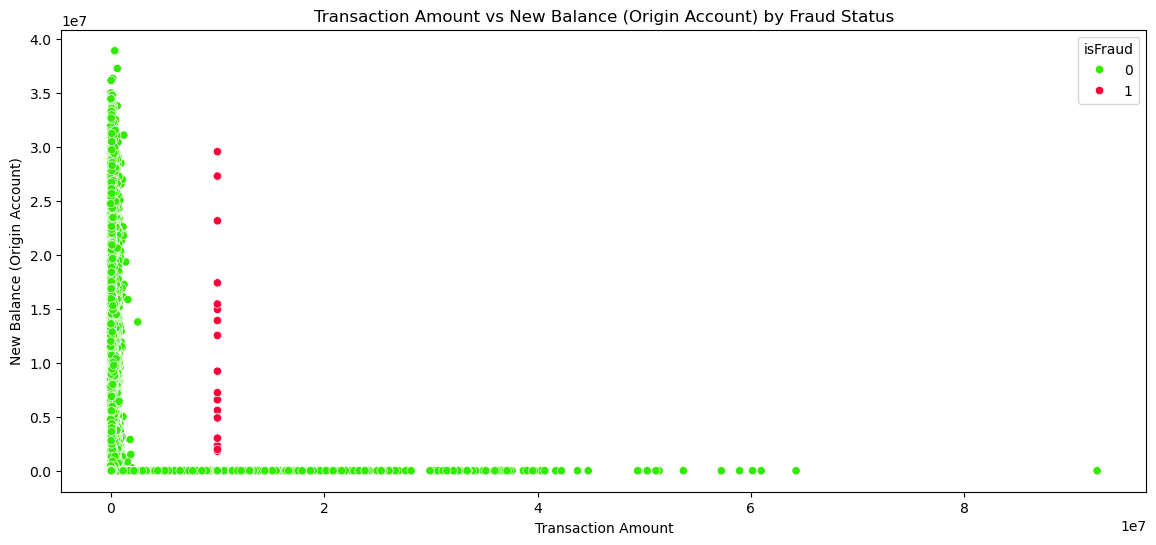

In [39]:
#Q2: Comparing transaction 'amount' and 'newbalanceOrig' to observe fraudulent behaviors using scatter plot
plt.figure(figsize=(14, 6))
sns.scatterplot(data=transactions, x='amount', y='newbalanceOrig', hue='isFraud', palette='prism')
plt.xlabel("Transaction Amount")
plt.ylabel("New Balance (Origin Account)")
plt.title("Transaction Amount vs New Balance (Origin Account) by Fraud Status")

type         amount                         isFraud     
                      mean           sum   count      mean  sum
0   CASH_IN  168928.914668  3.715676e+10  219955  0.000000    0
1  CASH_OUT  175584.659320  6.169343e+10  351360  0.001870  657
2     DEBIT    5445.890813  3.494628e+07    6417  0.000000    0
3   PAYMENT   13055.592085  4.420271e+09  338573  0.000000    0
4  TRANSFER  911827.155179  7.631537e+10   83695  0.007647  640

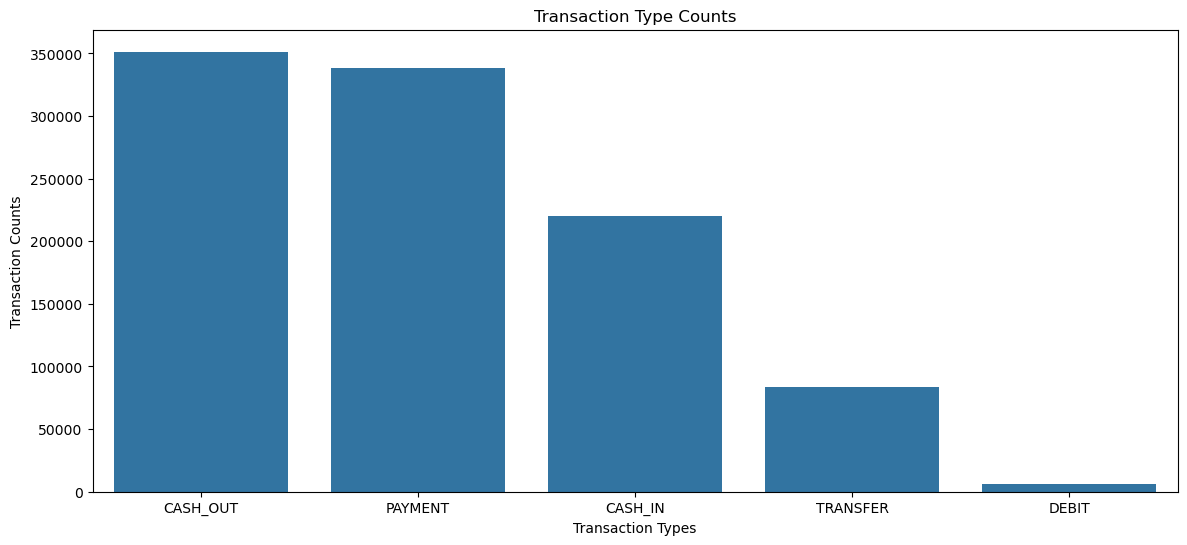

In [40]:
#Q3: Comparing types of transactions to typical amounts using boxplot
plt.figure(figsize=(14, 6))
sns.barplot(x=transactions['type'].value_counts().index, y=transactions['type'].value_counts().values)
plt.xlabel("Transaction Types")
plt.ylabel("Transaction Counts")
plt.title("Transaction Type Counts")

#breaking down transaction types and summary statistics
renamed_columns = {
    'amount' : ['mean', 'sum', 'count'],
    'isFraud': ['mean', 'sum']
}
transaction_types = transactions.groupby('type').agg(renamed_columns).reset_index()
transaction_types

Text(0.5, 1.0, 'Distributions of Transaction Types')

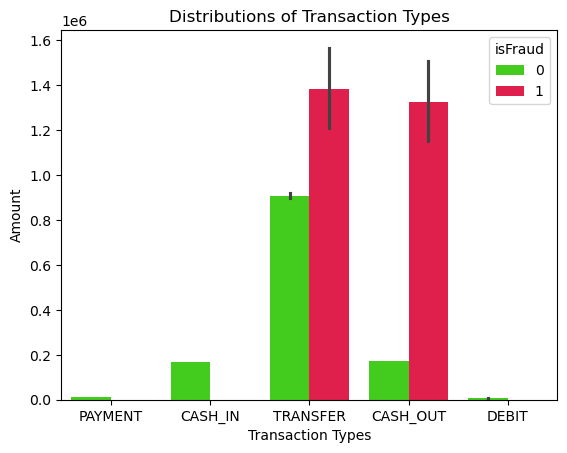

In [41]:
#Q4: Observing if transaction amounts vary when comparing fraudulent and non-fraudulent transactions across different transaction types? 
sns.barplot(data= transactions, x = 'type', y = 'amount', hue = 'isFraud',palette='prism')
plt.xlabel("Transaction Types")
plt.ylabel("Amount")    
plt.title("Distributions of Transaction Types")

Text(0.5, 1.0, 'Distribution of Transaction Amounts for Fraudulent Transactions')

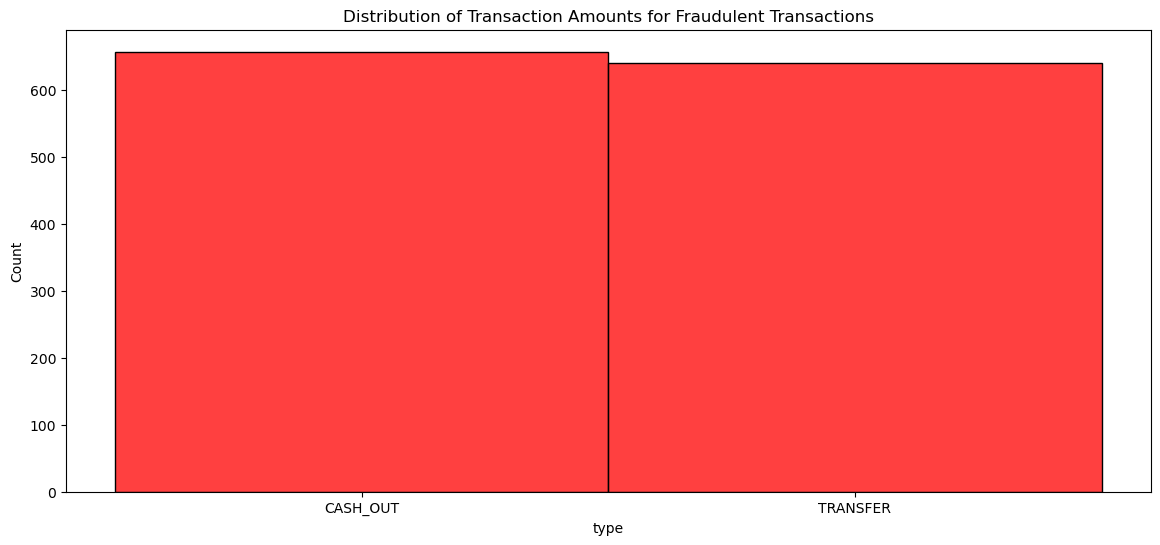

In [42]:
#Q4:Observing where fraudulent transactions are most common
plt.figure(figsize=(14, 6))
sns.histplot(transactions[transactions['isFraud'] == 1]['type'], color='red')
plt.title("Distribution of Transaction Amounts for Fraudulent Transactions")

In [43]:
#Q4: summarizing average transaction amounts by fraud and non fraudulent and transaction type to compare across categories.
avg_amounts = transactions.groupby(['type', 'isFraud'])['amount'].mean().reset_index()
avg_amounts = avg_amounts.pivot(index='type', columns='isFraud', values='amount').reset_index()
avg_amounts

isFraud,type,0,1
0,CASH_IN,168928.914668,NaN
1,CASH_OUT,173427.674988,1.326971e+06
2,DEBIT,5445.890813,NaN
3,PAYMENT,13055.592085,NaN
4,TRANSFER,908187.358989,1.384176e+06


In [44]:
#Q4:making pivot table of fraud and non-fradualent transactions based on types 
types_tab = transactions.pivot_table(index='type', columns='isFraud', values='amount', aggfunc='mean')
types_tab.columns = ['Non-Fraudulent', 'Fraudulent']
types_tab

,Non-Fraudulent,Fraudulent
type,,
CASH_IN,168928.914668,NaN
CASH_OUT,173427.674988,1.326971e+06
DEBIT,5445.890813,NaN
PAYMENT,13055.592085,NaN
TRANSFER,908187.358989,1.384176e+06


In [45]:
#Q5: Analyzing systmes built fraud flags to see if they are effective
table1 = pd.pivot_table(transactions, values='isFraud', index='isFlaggedFraud', aggfunc=['sum', 'count'])
table1.columns = ['Fraudulent Count', 'Total Count']
#Percentage = (Part / Whole) × 100
table1['Fraud Rate (%)'] = (table1['Fraudulent Count'] / table1['Total Count']) * 100
table1

,Fraudulent Count,Total Count,Fraud Rate (%)
isFlaggedFraud,,,
0,1296,999999,0.1296
1,1,1,100.0000


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

The histograms for 'oldbalanceOrg' and 'newbalanceOrig' show that the majority of transaction amounts are concentrated near zero, with very few transactions involving extremely large amounts. This is depicted by a highly skewed distribution in our histogram. We can also see this trend in the histograms above in red that only depict fraudulent counts are present in larger amounts. 

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

When comparing transaction 'amount' and 'newbalanceOrig' to observe fraudulent behaviors, the scatter plot above depicts that there are many fraudulent transactions occurring when there is a balance that drops to 0. This finding aligns with common fraudulent behavior where there is a complete transfer of all funds from one account to another. 

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

Based on the barplots above and the table, we can observe that transaction types that are 'cash_out' or 'cash_in' conduct an average of larger transactions at 175584.659320 and 168928.914668. Additionally, 'transfer' notably has a higher average at about 911827.155179. On the other hand, 'debt' and 'payment' where the transactions are smaller, averaging at 5445.890813 and 13055.592085. This trend is also observed in our bar graphs, where we see 'cash_out' and 'transfer' being the most commonly detected as fraudulent transactions. 

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

Yes, there does appear to be a variation in amounts based on fraudulent and non-fraudulent transactions across different transaction types. According to the pivot table, we can observe that fraudulent activity appears to occur in larger transactions and is most common in 'transfer' and 'cash_out.' 

## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

The system's built-in fraud flag (`isFlaggedFraud`) does not align with actual fraudulent activity. Out of nearly 1 million transactions, only 1 was flagged as being fraudulent. The system has a 100% accuracy of flagging; however, it misses about 1,000 other fraudulent cases. 